In [12]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [13]:
df = pd.read_csv('train.csv')

In [14]:
df.Embarked[df.Embarked.isnull()] = df.Embarked.dropna().mode().values
df['Embarked'][df.Embarked=='C']=1
df['Embarked'][df.Embarked=='Q']=2
df['Embarked'][df.Embarked=='S']=3
df['Embarked']=df.Embarked.astype(int)

randnum=np.random.randint(df['Age'].mean()- df['Age'].std(), df['Age'].mean() + df['Age'].std(), size=df['Age'].isnull().sum())
df['Age'][np.isnan(df['Age'])] = randnum
df['Age']=df.Age.astype(int)

df['Relatives']=df['SibSp']+df['Parch']

df['Sex'][df.Sex=='male']=1
df['Sex'][df.Sex=='female']=0
df['Sex']=df.Sex.astype(int)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: Set

In [15]:
X_train=df[['Pclass','Sex','Age','Fare','Embarked','Relatives']]
Y_train=df['Survived']

In [16]:
df_t = pd.read_csv('test.csv')

df_t.Embarked[df_t.Embarked.isnull()] = df_t.Embarked.dropna().mode().values
randnum=np.random.randint(df_t['Age'].mean()- df_t['Age'].std(), df_t['Age'].mean() + df_t['Age'].std(), size=df_t['Age'].isnull().sum())
df_t['Age'][np.isnan(df_t['Age'])] = randnum
df_t['Age']=df_t.Age.astype(int)
df_t['Relatives']=df_t['SibSp']+df_t['Parch']
df_t['Sex'][df_t.Sex=='male']=1
df_t['Sex'][df_t.Sex=='female']=0
df_t['Sex']=df_t.Sex.astype(int)
df_t['Embarked'][df_t.Embarked=='C']=1
df_t['Embarked'][df_t.Embarked=='Q']=2
df_t['Embarked'][df_t.Embarked=='S']=3
df_t['Embarked']=df_t.Embarked.astype(int)

X_test=df_t[['Pclass','Sex','Age','Fare','Embarked','Relatives']]
X_test=X_test[X_test.Fare.notnull()]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to b

In [17]:
from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_r = random_forest.predict(X_test)

In [18]:
from sklearn.linear_model.logistic import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_l = logreg.predict(X_test)

In [19]:
X_cluster=df[['Pclass','Sex','Age','Fare','Embarked','Relatives','Survived']]

In [20]:
from sklearn.cluster import KMeans

Y_cluster_k = KMeans(n_clusters=3, random_state=10).fit(X_cluster)

In [23]:
import scipy.cluster.hierarchy as sch

disMat = sch.distance.pdist(X_cluster,'euclidean') 
Z=sch.linkage(disMat,method='average')
P=sch.dendrogram(Z) 
plt.savefig('plot.png')
cluster= sch.fcluster(Z, 1, 'inconsistent')
cluster

array([ 86,  30,  99,  15, 168, 174,   7,  46, 148,  49,  47, 228, 113,
       242, 136, 218,  61, 215, 182, 134, 245, 180, 133, 258,  54, 242,
       205, 277,  88, 208, 244, 290, 177,  41,  35,  17, 110,  81,  51,
        52, 202, 267,  90,  67, 118, 113,  53, 118, 259,  51,  67,  81,
         4, 271,   6, 231, 129, 157,  64,  72,  90,  27,   2,  60, 244,
       183, 163, 111, 138,  95, 139,  73,  37, 144,  19, 102, 190,  98,
        65, 141,  78, 161, 177,  18, 126, 182,  69, 197, 277, 103, 159,
       114,  10, 259,  42, 210,  43,  39, 254, 245, 159, 121,  36, 165,
       201, 159,  79, 159, 207, 262,   8,  53,  84, 127,  53,  81,  40,
       267, 277,  63,  37, 121, 256, 140,   3,  52, 206, 107, 264, 195,
       178, 112, 217, 271, 152, 155,  49,  16, 131,  34, 183,  89, 151,
       119, 125,  69,  99,  66, 247, 215, 220,  39,  42, 212,  87,  10,
       134, 159, 100,  38, 217, 214,  98, 120,  67,  54,  20, 241,  49,
        20, 224,  60,  48,  81, 227, 124,  49, 233, 142, 185,  3

In [46]:
X_test['R']=Y_pred_r
X_test['L']=Y_pred_l
X_cluster['K']=Y_cluster_k.labels_
X_cluster['S']=cluster

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


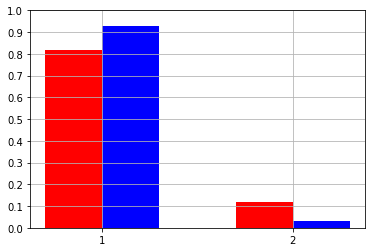

In [35]:
Gender_grouped=X_test.groupby(['Sex'])
G_Survival_Rate=Gender_grouped.sum()/Gender_grouped.count()

x=np.array([1,2])  
width=0.3  
plt.bar(x-width/2,G_Survival_Rate['R'],width,color='r')  
plt.bar(x+width/2,G_Survival_Rate['L'],width,color='b')
plt.xticks([1,2])  
plt.yticks(np.arange(0.0, 1.1, 0.1)) 
plt.grid(True,linestyle='-',color='0.7') 
plt.show()

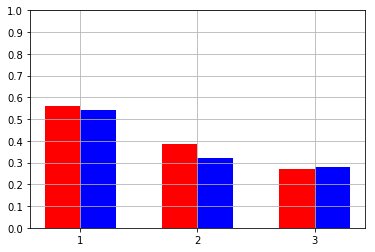

In [37]:
Pclass_grouped=X_test.groupby(['Pclass'])
P_Survival_Rate=Pclass_grouped.sum()/Pclass_grouped.count()

x=np.array([1,2,3])  
width=0.3  
plt.bar(x-width/2,P_Survival_Rate['R'],width,color='r')  
plt.bar(x+width/2,P_Survival_Rate['L'],width,color='b')
plt.xticks([1,2,3])  
plt.yticks(np.arange(0.0, 1.1, 0.1)) 
plt.grid(True,linestyle='-',color='0.7') 
plt.show()

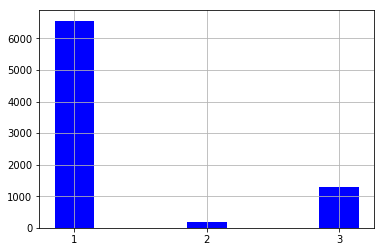

In [48]:
kmeans_grouped=X_cluster.groupby(['K'])

x=np.array([1,2,3])  
width=0.3  
plt.bar(x,kmeans_grouped.apply(np.size),width,color='b')  
plt.xticks([1,2,3])  
plt.grid(True,linestyle='-',color='0.7') 
plt.show()